In [61]:
from data_pre_processing import *
from pair_finder import *
from back_tester import *
import itertools

# Get Data 
---

In [62]:
#XVS/USDT_2024_30m & QI/USDT_2024_30m

In [63]:
#prices = pd.read_csv("binance_data/Wrapped BTC/2024/30m/merged_closing_prices.csv", index_col=0, parse_dates=True)

prices = pd.read_csv("binance_data/Staked_ETH_Bybit/merged_closing_prices.csv", index_col=0, parse_dates=True)

In [64]:
#get prices for dates greater than or equal to 2024-01-01 16:30:00	

#prices = prices.loc[prices.index >= "2024-01-01 16:30:00"]

# Trading simulation
---

* ## In-Sample Testing

In [65]:
#XVS/USDT_2024_30m & QI/USDT_2024_30m


crypto_1 = prices.columns[0]
crypto_2 = prices.columns[1]

cointegrated_pairs = [(crypto_1,
  crypto_2,
  0.731393,
  0.8501886494196308,
  0.22)]

In [66]:
#Params:
window_size = 336
entry_threshold= 2.0
exit_threshold=0.1
stop_loss_threshold= 10

In [67]:
sym1, sym2 = prices.columns
print(f"\nTesting strategy on pair: {sym1} and {sym2} ...")
S1 = prices[sym1]
S2 = prices[sym2]

# Compute the spread series and beta_series 
spread_series, beta_series, alpha_series = compute_spread_series(S1, S2, window_size)
#print(f"Hedge ratio (beta) for {sym1} ~ {sym2}: {beta:.4f}")

# Compute rolling z-score using the provided helper function.
zscore_series, rolling_mean, rolling_std = compute_rolling_zscore(spread_series, window_size)

# Generate trading signals (positions) based on the spread's z-score
positions_series,  win_indexs, loss_indexs, price_changes_S1, price_changes_S2 = backtest_pair_rolling(spread_series,S1,S2,zscore_series, entry_threshold, exit_threshold, stop_loss_threshold)




Testing strategy on pair: BYBIT_STETH/USDT, 30_fd7e3 and BYBIT_ETH/USDT, 30_1dfe3 ...
Total trades closed: 439 (Wins=433, Losses=6)
Win rate: 0.99


(array([1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00,
        2.000e+00, 2.000e+00, 1.000e+00, 5.000e+00, 3.000e+00, 8.000e+00,
        5.000e+00, 2.300e+01, 5.800e+01, 2.860e+02, 1.164e+03, 4.664e+03,
        6.601e+03, 3.194e+03, 6.240e+02, 1.330e+02, 4.200e+01, 1.300e+01,
        1.100e+01, 3.000e+00, 9.000e+00, 2.000e+00, 1.000e+00, 1.000e+00,
        1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([-17.13940549, -16.20311559, -15.26682569, -14.33053579,
        -13.39424589, -12.45795599, -11.52166609, -10.58537619,
         -9.64908629,  -8.71279639,  -7.77650649,  -6.84021659,
         -5.90392669,  -4.96763679,  -4.03134689,  -3.09505699,
         -2.15876709,  -1.22247719,  -0.28618729,   0.65010261,
          1.58639251,   2.52268241,   3.45897231,   4.39

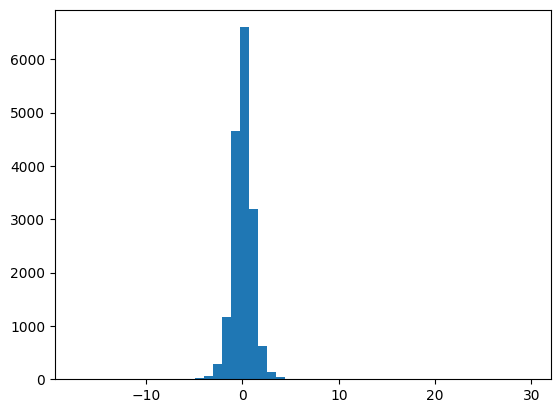

In [68]:
plt.hist(zscore_series, bins=50)

In [69]:
#Compute normalised difference between the two prices
normalised_abs_diff = np.abs((S1 - S2) / (S1 + S2))

#Compute the average normalised difference
np.mean(normalised_abs_diff)

np.float64(0.0003968226419110906)

In [70]:
#SETH and ETH Distance: 0.0003968226419110906

s_eth_distance = 0.0003968226419110906
w_bitcoin_distance = 0.0006442955592394416

percentage = s_eth_distance/w_bitcoin_distance * 100
percentage


61.59015629092954

In [71]:
sym1

'BYBIT_STETH/USDT, 30_fd7e3'

In [72]:
price_changes_S1_non_zero = [x for x in price_changes_S1 if x != 0]
price_changes_S2_non_zero = [x for x in price_changes_S2 if x != 0]

len(price_changes_S2_non_zero)

439

In [73]:
S1

timestamp
2024-01-01 16:30:00    2312.58
2024-01-01 17:00:00    2313.49
2024-01-01 17:30:00    2311.86
2024-01-01 18:00:00    2329.05
2024-01-01 18:30:00    2325.79
                        ...   
2024-12-31 21:30:00    3351.29
2024-12-31 22:00:00    3333.82
2024-12-31 22:30:00    3337.37
2024-12-31 23:00:00    3343.34
2024-12-31 23:30:00    3337.72
Name: BYBIT_STETH/USDT, 30_fd7e3, Length: 17535, dtype: float64

In [74]:
initial_capital = 10_000.0
#tx_cost= 0.00031 #0.031% transaction cost
tx_cost= 0.00025 #0.025% transaction cost

trade_profits, cumulative_profit_series, entry_indices, exit_indices, long_spread_loss_count, short_spread_loss_count, number_of_dual_leg_profits = simulate_strategy_trade_pnl(S1, S2, positions_series, initial_capital, beta_series,tx_cost)

Dual Leg loss: -16.247434754472152, 27.729571158685097
Dual Leg loss: 22.32948751506139, -11.704729661287903
Dual Leg profit: 20.080338791356706, 2.266578842001793
Dual Leg loss: 63.96361064703859, -39.905916351730475
Dual Leg loss: -15.206513043504383, 26.904571752089712
Dual Leg loss: -1.8177586543344835, 14.28876396084415
Dual Leg profit: 8.432511351227191, 3.4030146725084913
Dual Leg loss: -6.511056389436352, 15.121797027032473
Dual Leg loss: -8.448340798924235, 20.747026365717385
Dual Leg loss: 103.75082464054164, -92.29311576532959
Dual Leg loss: -31.554633107816358, 43.98025265975469
Dual Leg loss: 18.268742302628944, -8.995010619602903
Dual Leg loss: -42.602539921712115, 63.14017769893104
Dual Leg loss: -0.40625344776146144, 12.763121314336468
Dual Leg profit: 11.510797464970544, 11.52473241511883
Dual Leg loss: 20.295120165324043, -3.0946691030463587
Dual Leg loss: -103.07530873311829, 113.2304764493557
Dual Leg loss: 22.156128002870837, -13.119999484999612
Dual Leg profit: 1.

(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   1.,   0.,   0.,   1.,   0.,   1.,   1.,
          0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,  29., 140.,  88.,  66.,  35.,
         27.,  23.,   4.,   2.,   5.,   2.,   3.,   3.,   1.,   2.,   0.,
          0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([-109.17550555, -107.45628458, -105.73706361, -104.01784265,
        -102.29862168, -100.57940071,  -98.86017975,  -97.14095878,
         -95.42173781,  -93.70251684,  -91.98329588,  -90.26407491,
         -88.54485394,  -86.82563297,  -85.10641201,  -83.38719104,
         -81.66797007,  -79.9487491 ,  -78.229

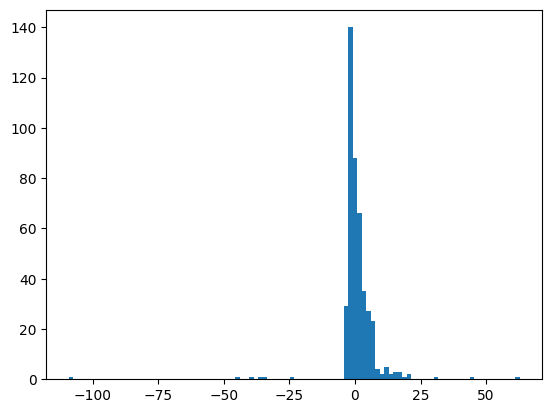

In [75]:
plt.hist(trade_profits, bins=100)

In [76]:
number_of_dual_leg_profits

56

In [77]:
short_spread_loss_count

111

In [78]:
#filter profits by positive values
print(np.mean(trade_profits))

0.8242877824838508


In [79]:
#Filter for negative values

trade_profits_neg = [x for x in trade_profits if x < 0]
print(f"Average trade loss:  € {np.mean(trade_profits_neg)}")

trade_profits_pos = [x for x in trade_profits if x > 0]
print(f"Average trade win:  € {np.mean(trade_profits_pos)}")

print("Number of negative profits(profits that were less than the transaction cost): ", len(trade_profits_neg))
print("Number of positive profits (profits that were greater than the transaction cost): ", len(trade_profits_pos))



Average trade loss:  € -2.8508156039097727
Average trade win:  € 4.516172462879272
Number of negative profits(profits that were less than the transaction cost):  220
Number of positive profits (profits that were greater than the transaction cost):  219


Text(0.5, 1.0, 'Returns Distribution for Pair BYBIT_STETH/USDT, 30_fd7e3 and BYBIT_ETH/USDT, 30_1dfe3')

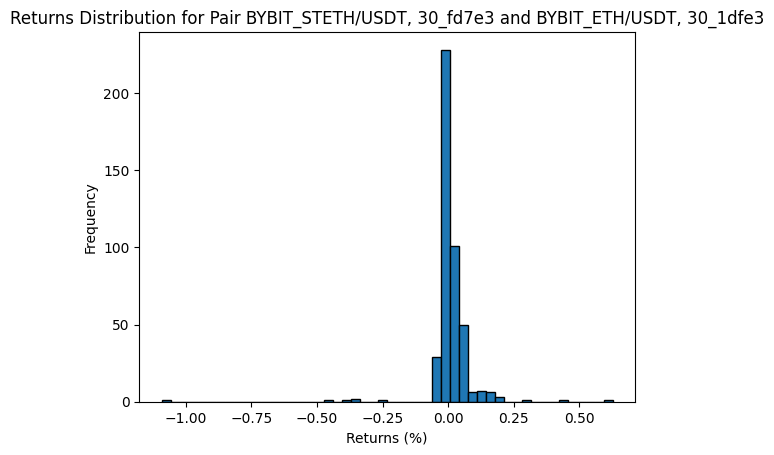

In [80]:
#Calculate returns based on the trade profits
trade_profits = np.array(trade_profits)
returns = trade_profits/initial_capital * 100

#Plot the returns
plt.hist(returns, bins=50, edgecolor='black')
plt.xlabel('Returns (%)')   
plt.ylabel('Frequency')
plt.title(f'Returns Distribution for Pair {sym1} and {sym2}') 

In [81]:
#Calculate percentage price changes for each asset
price_changes_S1 = np.array(price_changes_S1)

In [82]:
# daily_pnl_series, cum_pnl_series, cum_pnl_pct_series, shares_S1_list, shares_S2_list = simulate_strategy_pnl(S1, S2, positions_series, beta_series=beta_series, initial_capital=1_000)

# print(f"Total PnL: {cum_pnl_series[-1]:.2f} EUR")
# print(f"Total PnL (%): {cum_pnl_pct_series[-1]:.2f}%")


In [83]:
#Obtain non-zero price changes
price_changes_S1_non_zero = [x for x in price_changes_S1 if x != 0]
price_changes_S2_non_zero = [x for x in price_changes_S2 if x != 0]

#Convert price changes to percentage
price_changes_S1_non_zero_percent = [(x*100) for x in price_changes_S1_non_zero]
price_changes_S2_non_zero_percent = [(x*100) for x in price_changes_S2_non_zero]

#Print average price changes
print(f"Average price change S1: {np.mean(price_changes_S1_non_zero_percent)} %", f"Average price change S1: {np.mean(price_changes_S2_non_zero_percent)} %")
print(f"Number of trades: {len(price_changes_S1_non_zero)}")

Average price change S1: 0.022555036980688576 % Average price change S1: 0.0942435815815997 %
Number of trades: 439


Percentage return: 3.62 %


/var/folders/v0/xxx_2wqx4qsc_858pvgmg3_m0000gp/T/ipykernel_1182/54204168.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  percentage_return = cumulative_profit_series[-1]/initial_capital * 100


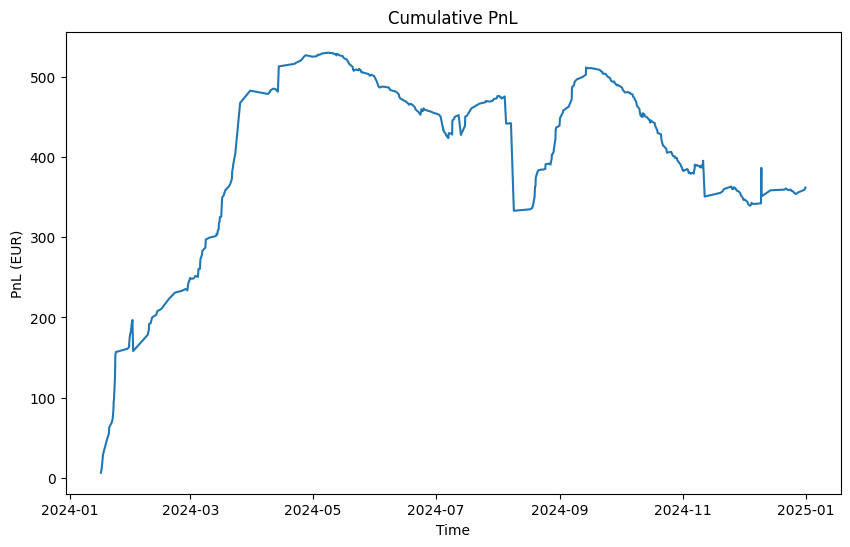

In [84]:
percentage_return = cumulative_profit_series[-1]/initial_capital * 100
print(f"Percentage return: {percentage_return:.2f} %")


#PROFIT SHOULD BE 0.15 EUR

plt.figure(figsize=(10,6))
plt.plot(cumulative_profit_series)
plt.title('Cumulative PnL')
plt.xlabel('Time')
plt.ylabel('PnL (EUR)')
plt.show()

Long Entries In Window: 2, Short Entries In Window: 2
Wins In Window: 4, Losses In Window: 0


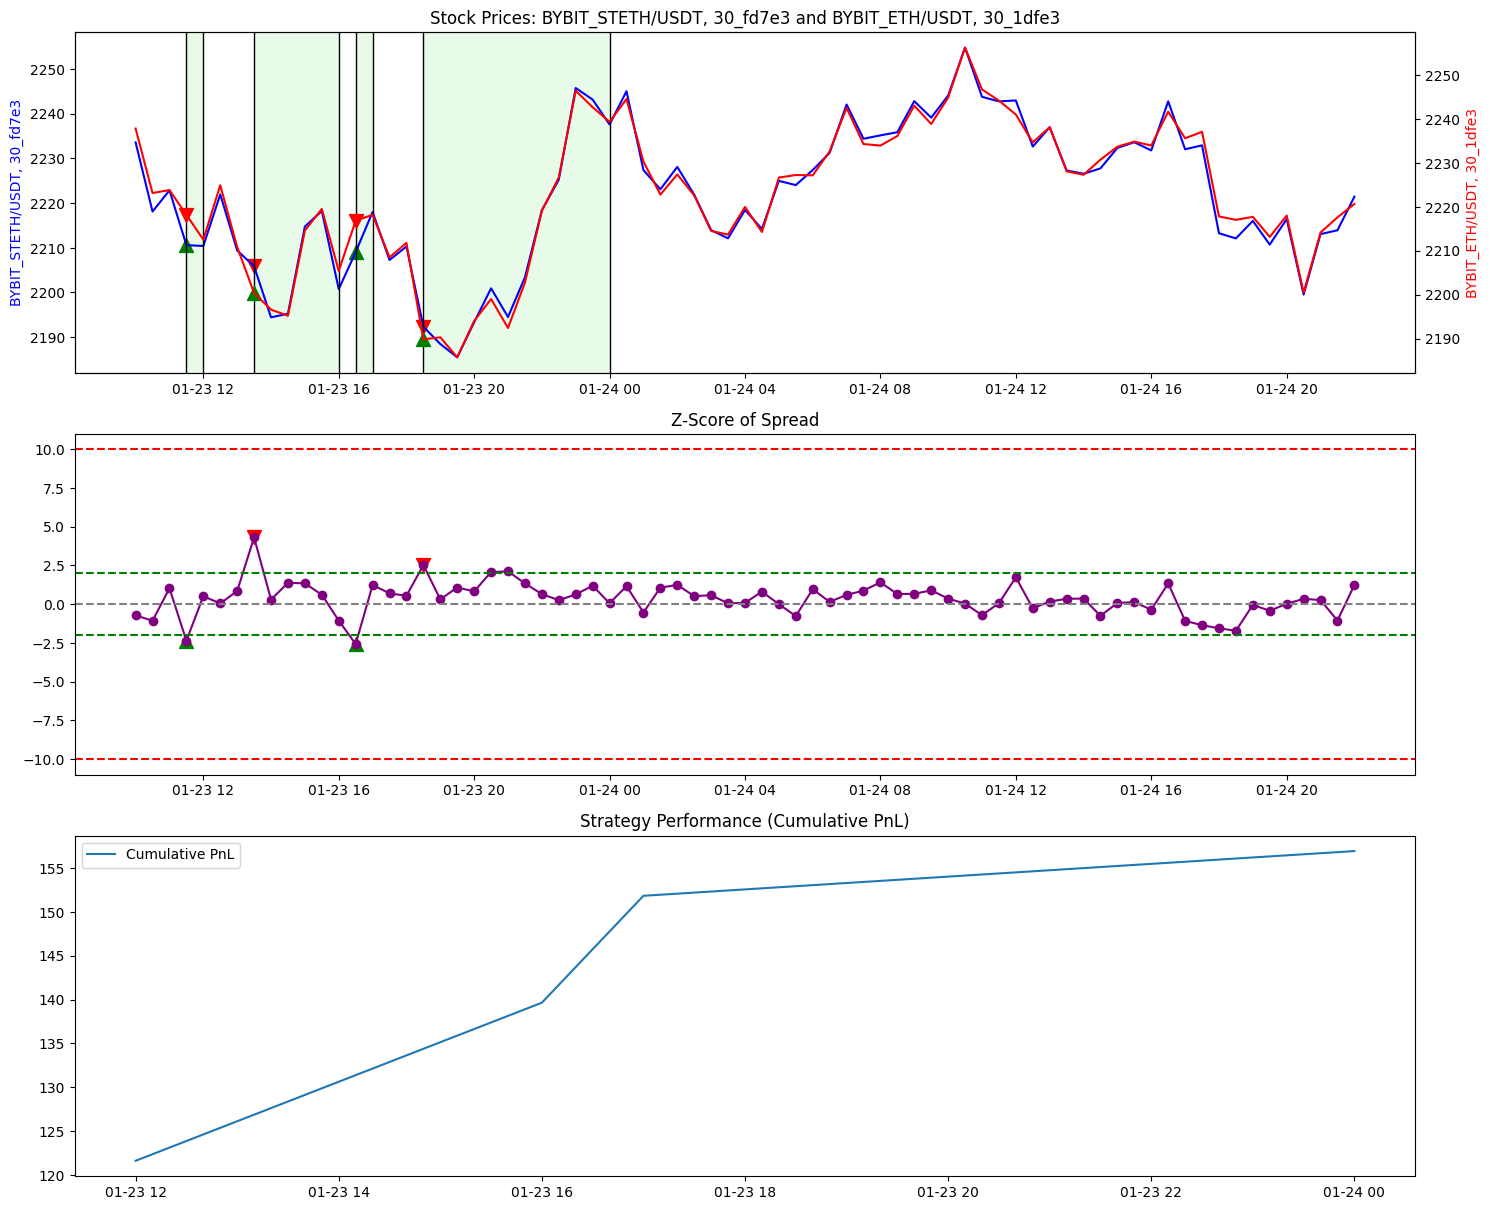

In [85]:
#Plot trading simulation
# window_start = '2023-10-03 00:00:00'
# window_end = '2023-10-03 10:00:00'


window_start = '2024-01-23 10:00:00'
window_end = '2024-01-24 22:00:00'

# window_start = None
# window_end = None

#NOTE THAT THE TIMES ON THE X AXIS SHOW THE HOURS AND MINUTES


plot_trading_simulation(S1, S2, sym1,sym2,zscore_series, positions_series,entry_threshold,stop_loss_threshold,
                        cumulative_profit_series,win_indexs=win_indexs,loss_indexs=loss_indexs,
                        window_start=window_start, window_end=window_end)



In [86]:


#Get prices at the start and end of the first trade
S1_price_start = S1[entry_indices]
S2_price_start = S2[entry_indices]

S1_price_end = S1.loc[exit_indices]
S2_price_end = S2.loc[exit_indices]


#Calculate the price changes by converting the series to numpy arrays
S1_price_start = S1_price_start.to_numpy()
S2_price_start = S2_price_start.to_numpy()

S1_price_end = S1_price_end.to_numpy()
S2_price_end = S2_price_end.to_numpy()

print("BEFORE ALIGNMENT")

#Make sure the arrays have the same shape
print(S1_price_start.shape)
print(S2_price_start.shape)


print(S1_price_end.shape)
print(S2_price_end.shape)


if S1_price_start.shape > S1_price_end.shape:
    S1_price_start = S1_price_start[:len(S1_price_end)]

if S2_price_start.shape > S2_price_end.shape:
    S2_price_start = S2_price_start[:len(S2_price_end)]
 
print("AFTER ALIGNMENT")

#Make sure the arrays have the same shape
print(S1_price_start.shape)
print(S2_price_start.shape)

print(S1_price_end.shape)
print(S2_price_end.shape)

#Get the price changes
S1_price_change = S1_price_end - S1_price_start
S2_price_change = S2_price_end - S2_price_start

#Get percentage price changes
S1_price_change_percent = S1_price_change/S1_price_start * 100
S2_price_change_percent = S2_price_change/S2_price_start * 100

#Get absolute percentage price changes
S1_price_change_percent_abs = np.abs(S1_price_change_percent)
S2_price_change_percent_abs = np.abs(S2_price_change_percent)



# #Get the price changes
# S1_price_change = S1_price_end - S1_price_start
# S2_price_change = S2_price_end - S2_price_start


BEFORE ALIGNMENT
(439,)
(439,)
(439,)
(439,)
AFTER ALIGNMENT
(439,)
(439,)
(439,)
(439,)


In [87]:
#Print average S1 price change percent rounded to 2 decimal places

#Average Absolute Percentage Reversion
#---------------------------------------

print(f"Average absolute S1 price change percent: {np.mean(S1_price_change_percent_abs):.2f}%")
print(f"Average absolute S2 price change percent: {np.mean(S2_price_change_percent_abs):.2f}%")

print(f"Average of average absolute price changes: {(np.mean(S1_price_change_percent_abs) + np.mean(S2_price_change_percent_abs))/2:.2f}%")


Average absolute S1 price change percent: 0.76%
Average absolute S2 price change percent: 0.74%
Average of average absolute price changes: 0.75%
